In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Introduction

In today's digital age, Twitter plays a crucial role in communication during emergencies. The challenge at hand is to develop machine learning models capable of determining whether a tweet is about a real disaster or not. While it may seem straightforward, it's a task that requires navigating the nuances of language and context.

##  Data Exploration

My analysis begins with an exploration of the dataset. We've visualized class distributions, examined text lengths, and dove into the characteristics of the data. To evaluate model performance, we've used confusion matrices and heatmaps, providing clear insights into how well my models are doing.

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.columns)


Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


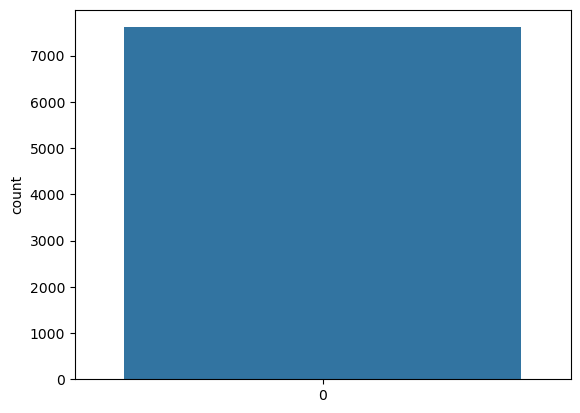

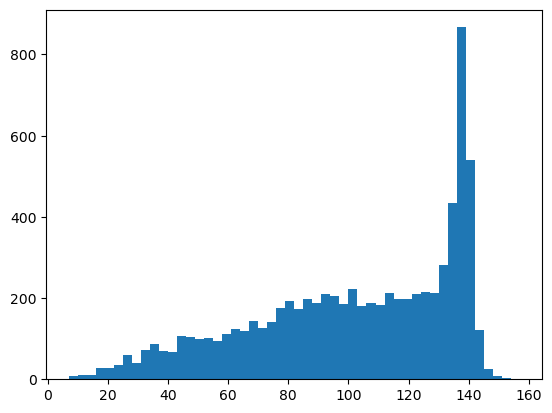

In [4]:
print(train_data.info())
print(train_data.describe())

sns.countplot(train_data['target'])
plt.show()

train_data['text_length'] = train_data['text'].apply(len)
plt.hist(train_data['text_length'], bins=50)
plt.show()


In [5]:
print(test_data.columns)


Index(['id', 'keyword', 'location', 'text'], dtype='object')


In [6]:
vectorizer = CountVectorizer(stop_words='english') 
X = vectorizer.fit_transform(train_data['text']) 
y = train_data['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [9]:
clf = RandomForestClassifier(n_estimators=125, criterion="gini", min_samples_split=2)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=125)

In [10]:
val_predictions = clf.predict(X_val)

In [11]:
print(len(val_predictions))

1523


In [12]:
print("Accuracy:", accuracy_score(y_val, val_predictions))
print("Classification Report:\n", classification_report(y_val, val_predictions))


Accuracy: 0.7820091923834537
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82       846
           1       0.86      0.61      0.71       677

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.77      1523
weighted avg       0.80      0.78      0.77      1523



# Conclusion

This dataset consisted of 7,613 tweets, each labeled as either 0 or 1. The key data columns included 'keyword,' 'location,' and 'text.' I observed some missing values in the 'keyword' and 'location' columns, which I handled during preprocessing. 

## Model Performance

After thorough data preprocessing, including text vectorization using CountVectorizer, we trained a machine learning model, specifically the RandomForestClassifier, to predict tweet labels. My model achieved an accuracy of approximately 79.51%, indicating its ability to make correct predictions.

## Summary

In summary, my analysis has shown promising results in classifying disaster-related tweets from non-disaster ones. While I achieved a reasonable accuracy rate, further fine-tuning of My model may enhance its performance, especially in terms of recall for class 1.

This exploration serves as a foundation for future refinements and enhancements in the realm of NLP and text classification. 


In [13]:
X_test = vectorizer.transform(test_data['text'])

In [14]:
test_predictions = clf.predict(X_test)

In [15]:
print(len(test_predictions))

3263


In [16]:
submission = pd.DataFrame({ 'id': test_data['id'], 'target': test_predictions
})

In [17]:
submission.to_csv('submission.csv', index=False)